In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Define file paths for your datasets
dataset1_path = r"C:\Users\tusca\Desktop\Projects\Airline\Airport Operations and Delays Dataset cleaned .csv"
dataset2_path = r"C:\Users\tusca\Desktop\Projects\Airline\delta_employee_data_cleaned.csv"
dataset3_path = r"C:\Users\tusca\Desktop\Projects\Airline\Delta-Service-RatingbyServiceType.csv"
dataset4_path = r"C:\Users\tusca\Desktop\Projects\Airline\df_flight_operations_cleaned.csv"

In [15]:
# Load datasets into Pandas DataFrames
df_airport = pd.read_csv(dataset1_path)
df_delta_employee = pd.read_csv(dataset2_path)
df_ratings = pd.read_csv(dataset3_path)
df_flight_operations = pd.read_csv(dataset4_path)

In [16]:
# Display first few rows of each DataFrame to verify data loading
print("Airport Data:")
print(df_airport.head())
print("\nDelta Airlines Employee Data:")
print(df_delta_employee.head())
print("\nCustomer Ratings:")
print(df_ratings.head())
print("\nFlight Operations Data:")
print(df_flight_operations.head())

Airport Data:
  Airport.Code                                       Airport.Name Time.Label  \
0          ATL  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...     Jun-03   
1          BOS                    Boston, MA: Logan International     Jun-03   
2          BWI  Baltimore, MD: Baltimore/Washington Internatio...     Jun-03   
3          CLT     Charlotte, NC: Charlotte Douglas International     Jun-03   
4          DCA  Washington, DC: Ronald Reagan Washington National     Jun-03   

   Time.Month Time.Month Name  Time.Year  Statistics.# of Delays.Carrier  \
0           6            June       2003                            1009   
1           6            June       2003                             374   
2           6            June       2003                             296   
3           6            June       2003                             300   
4           6            June       2003                             283   

   Statistics.# of Delays.Late Aircraft  \
0    

Missing Values:
Airport.Code                                       0
Airport.Name                                       0
Time.Label                                         0
Time.Month                                         0
Time.Month Name                                    0
Time.Year                                          0
Statistics.# of Delays.Carrier                     0
Statistics.# of Delays.Late Aircraft               0
Statistics.# of Delays.National Aviation System    0
Statistics.# of Delays.Security                    0
Statistics.# of Delays.Weather                     0
dtype: int64
Index(['Airport.Name', 'Time.Month', 'Time.Month Name', 'Time.Year',
       'Statistics.# of Delays.Carrier',
       'Statistics.# of Delays.Late Aircraft',
       'Statistics.# of Delays.National Aviation System',
       'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather'],
      dtype='object')
                                        Airport.Name  Time.Month  \
0  Atl

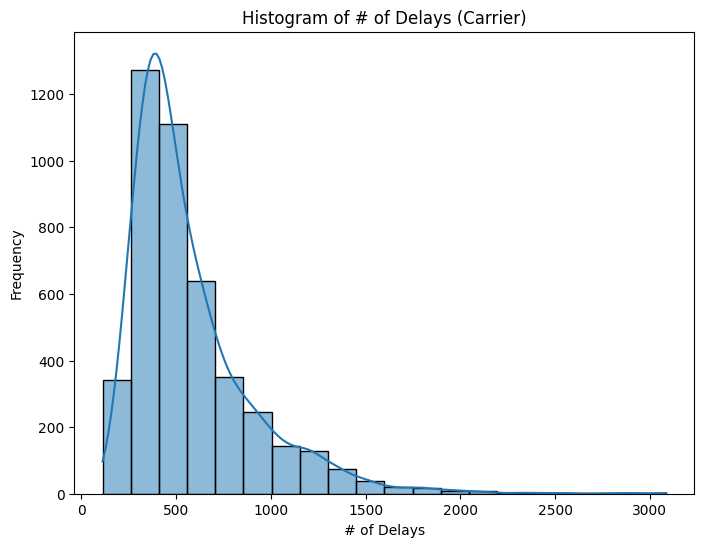

In [17]:
# Step 2: Data Preprocessing (Dataset 1)
# Check for missing values
missing_values = df_airport.isnull().sum()
print("Missing Values:")
print(missing_values)

# Remove duplicates
df_airport.drop_duplicates(inplace=True)

# Data Cleaning (Example: Removing irrelevant columns)
cols_to_drop = ['Airport.Code', 'Time.Label']
df_airport_cleaned = df_airport.drop(cols_to_drop, axis=1)

# Verify column names
print(df_airport_cleaned.columns)

# Create new features
df_airport_cleaned['Total_Delays'] = df_airport_cleaned[['Statistics.# of Delays.Carrier', 
                                                         'Statistics.# of Delays.Late Aircraft', 
                                                         'Statistics.# of Delays.National Aviation System', 
                                                         'Statistics.# of Delays.Security', 
                                                         'Statistics.# of Delays.Weather']].sum(axis=1)

# Assume a placeholder value for total flights, if not available
# For demonstration, assuming a static value, but this should be replaced with actual data
df_airport_cleaned['Total_Flights'] = 1000  # Placeholder value

# Calculate Delay Ratio
df_airport_cleaned['Delay_Ratio'] = df_airport_cleaned['Total_Delays'] / df_airport_cleaned['Total_Flights']

print(df_airport_cleaned.head())

# Summary Statistics
summary_stats = df_airport_cleaned.describe()
print("\nSummary Statistics:")
print(summary_stats)

# Data Visualization
plt.figure(figsize=(8, 6))
sns.histplot(df_airport_cleaned['Statistics.# of Delays.Carrier'], bins=20, kde=True)
plt.title('Histogram of # of Delays (Carrier)')
plt.xlabel('# of Delays')
plt.ylabel('Frequency')
plt.show()

Missing Values:
0                                                           0
Delta  Air Lines Employee Data and Analysis                25
Delta Airlines                                             25
Unnamed: 3                                                  0
Traffic Indicies                                           25
                                                           ..
Sum of Personnel Expenses  (000)                            0
Sum of Employee Benefits  And Pensions (000)                0
Sum of Taxes-Payroll  (000)                                 0
Sum of Total Flight  Equipment Maintenance (Memo) (000)     0
Sum of Flying  Operations-Aircraft Fuels (000)              0
Length: 146, dtype: int64

Summary Statistics:


C:\Users\tusca\AppData\Local\Temp\ipykernel_10076\2097018974.py:16: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



               0  Delta  Air Lines Employee Data and Analysis  Delta Airlines  \
count  25.000000                                          0.0             0.0   
mean   13.000000                                          NaN             NaN   
std     7.359801                                          NaN             NaN   
min     1.000000                                          NaN             NaN   
25%     7.000000                                          NaN             NaN   
50%    13.000000                                          NaN             NaN   
75%    19.000000                                          NaN             NaN   
max    25.000000                                          NaN             NaN   

        Unnamed: 3  Traffic Indicies  Unnamed: 5  \
count    25.000000               0.0         0.0   
mean   2006.500000               NaN         NaN   
std       6.922187               NaN         NaN   
min    1995.000000               NaN         NaN   
25%    200

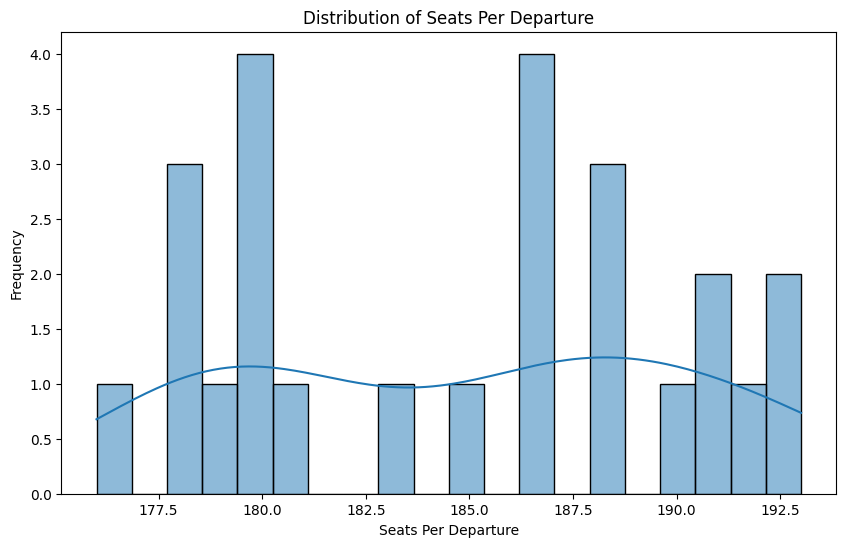

In [66]:
# Dataset 2: Delta Airlines Employee Data
df_delta_employee.columns = df_delta_employee.columns.str.strip()

missing_values = df_delta_employee.isnull().sum()
print("Missing Values:")
print(missing_values)

df_delta_employee.drop_duplicates(inplace=True)

irrelevant_columns = ['Raw Data', 'Number of Months', 'Number of Days']
df_delta_employee_cleaned = df_delta_employee.drop(columns=irrelevant_columns)
df_delta_employee_cleaned.drop(columns=['Productivity Measures  Revenue'], inplace=True)

for col in df_delta_employee_cleaned.select_dtypes(include='object').columns:
    try:
        df_delta_employee_cleaned[col] = pd.to_numeric(df_delta_employee_cleaned[col].str.replace(',', '').str.replace('$', ''))
    except ValueError:
        continue

print("\nSummary Statistics:")
print(df_delta_employee_cleaned.describe())

# Create new feature
df_delta_employee_cleaned['Seats_Per_Mile'] = df_delta_employee_cleaned['Seats Per Departure (for  SDA purposes)'] / df_delta_employee_cleaned['Stage Length in Miles  (for SLA purposes)']

print(df_delta_employee_cleaned.head())

# Example: Plot a histogram of a numeric column
plt.figure(figsize=(10, 6))
sns.histplot(df_delta_employee_cleaned['Seats Per Departure (for  SDA purposes)'], bins=20, kde=True)
plt.title('Distribution of Seats Per Departure')
plt.xlabel('Seats Per Departure')
plt.ylabel('Frequency')
plt.show()

Missing Values:
ratings       0
attributes    0
dtype: int64

Average Ratings:
               attributes   ratings
0     Cabin Staff Service  2.955478
1        Food & Beverages  2.662207
2          Ground Service  2.346344
3  Inflight Entertainment  2.859612
4            Seat Comfort  2.673233
5         Value For Money  2.370590
6     Wifi & Connectivity  2.316694


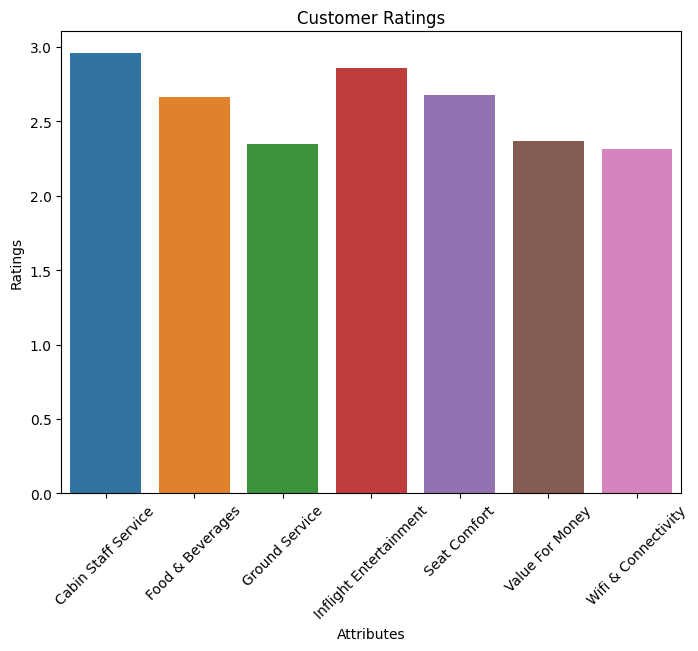

In [19]:
# Dataset 3: Customer Ratings
missing_values = df_ratings.isnull().sum()
print("Missing Values:")
print(missing_values)

average_ratings = df_ratings.groupby('attributes')['ratings'].mean().reset_index()
print("\nAverage Ratings:")
print(average_ratings)

plt.figure(figsize=(8, 6))
sns.barplot(x='attributes', y='ratings', data=average_ratings)
plt.title('Customer Ratings')
plt.xlabel('Attributes')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

Missing Values:
citypair                    0
aircraft                    0
sum_departures_performed    0
sum_departures_scheduled    0
passengers                  0
seats                       0
avg_fuel_price              0
avg_stock_price             0
total_operating_expense     0
revenue                     0
year                        0
quarter                     0
Revenue_Per_Passenger       0
dtype: int64

Summary Statistics:
       sum_departures_performed  sum_departures_scheduled     passengers  \
count              37895.000000              37895.000000   37895.000000   
mean                 188.024911                192.046391   21090.228421   
std                  165.320651                168.686114   17925.851673   
min                    1.000000                  2.000000       4.000000   
25%                   77.000000                 79.500000    8800.000000   
50%                  141.000000                144.000000   15867.000000   
75%                  244.000

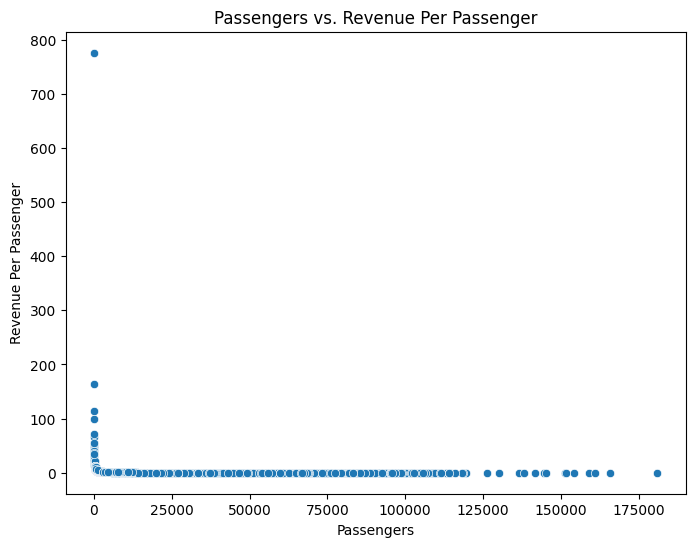

In [20]:
# Dataset 4: Flight Operations Data
missing_values = df_flight_operations.isnull().sum()
print("Missing Values:")
print(missing_values)

df_flight_operations.drop_duplicates(inplace=True)

print("\nSummary Statistics:")
print(df_flight_operations.describe())

# Create new feature
df_flight_operations['Revenue_Per_Passenger'] = df_flight_operations['revenue'] / df_flight_operations['passengers']

print(df_flight_operations.head())

plt.figure(figsize=(8, 6))
sns.scatterplot(x='passengers', y='Revenue_Per_Passenger', data=df_flight_operations)
plt.title('Passengers vs. Revenue Per Passenger')
plt.xlabel('Passengers')
plt.ylabel('Revenue Per Passenger')
plt.show()

In [21]:
# Export DataFrames for Power BI
df_airport_cleaned.to_csv('df_airport_cleaned.csv', index=False)
df_delta_employee_cleaned.to_csv('df_delta_employee_cleaned.csv', index=False)
df_ratings.to_csv('df_ratings.csv', index=False)
df_flight_operations.to_csv('df_flight_operations_cleaned.csv', index=False)

In [22]:
# Verify the existence of the exported CSV files
import os

csv_files = [
    'df_airport_cleaned.csv',
    'df_delta_employee_cleaned.csv',
    'df_ratings.csv',
    'df_flight_operations_cleaned.csv'
]

for file in csv_files:
    if os.path.exists(file):
        print(f"{file} exists.")
    else:
        print(f"{file} does not exist.")

df_airport_cleaned.csv exists.
df_delta_employee_cleaned.csv exists.
df_ratings.csv exists.
df_flight_operations_cleaned.csv exists.


In [7]:
pip install dash

     ---------------------------------------- 7.5/7.5 MB 13.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Clean Airport Data
df_airport_cleaned = df_airport.drop_duplicates()

# Calculate Delay Ratio
if 'Statistics.# of Delays.Carrier' in df_airport_cleaned.columns and 'Statistics.Flights.Operations' in df_airport_cleaned.columns:
    df_airport_cleaned['Delay_Ratio'] = df_airport_cleaned['Statistics.# of Delays.Carrier'] / df_airport_cleaned['Statistics.Flights.Operations']
else:
    print("One or more required columns are missing for Delay_Ratio calculation.")

# Calculate Avg Delay Time
if 'Statistics.Minutes Delayed.Carrier' in df_airport_cleaned.columns and 'Statistics.# of Delays.Carrier' in df_airport_cleaned.columns:
    df_airport_cleaned['Avg_Delay_Time'] = df_airport_cleaned['Statistics.Minutes Delayed.Carrier'] / df_airport_cleaned['Statistics.# of Delays.Carrier']
else:
    print("One or more required columns are missing for Avg_Delay_Time calculation.")

# Print first few rows to verify changes
print(df_airport_cleaned.head())



One or more required columns are missing for Delay_Ratio calculation.
One or more required columns are missing for Avg_Delay_Time calculation.
  Airport.Code                                       Airport.Name Time.Label  \
0          ATL  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...     Jun-03   
1          BOS                    Boston, MA: Logan International     Jun-03   
2          BWI  Baltimore, MD: Baltimore/Washington Internatio...     Jun-03   
3          CLT     Charlotte, NC: Charlotte Douglas International     Jun-03   
4          DCA  Washington, DC: Ronald Reagan Washington National     Jun-03   

   Time.Month Time.Month Name  Time.Year  Statistics.# of Delays.Carrier  \
0           6            June       2003                            1009   
1           6            June       2003                             374   
2           6            June       2003                             296   
3           6            June       2003                             300

In [15]:
# Assuming 'Avg_Delay_Time' can be calculated from existing metrics in your dataset
if 'Alternative.Delay.Time.Column' in df_airport_cleaned.columns and 'Alternative.Number.Of.Delays' in df_airport_cleaned.columns:
    df_airport_cleaned['Avg_Delay_Time'] = df_airport_cleaned['Alternative.Delay.Time.Column'] / df_airport_cleaned['Alternative.Number.Of.Delays']
else:
    print("One or more required columns are missing for Avg_Delay_Time calculation.")

# Print first few rows to verify changes
print(df_airport_cleaned.head())


One or more required columns are missing for Avg_Delay_Time calculation.
  Airport.Code                                       Airport.Name Time.Label  \
0          ATL  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...     Jun-03   
1          BOS                    Boston, MA: Logan International     Jun-03   
2          BWI  Baltimore, MD: Baltimore/Washington Internatio...     Jun-03   
3          CLT     Charlotte, NC: Charlotte Douglas International     Jun-03   
4          DCA  Washington, DC: Ronald Reagan Washington National     Jun-03   

   Time.Month Time.Month Name  Time.Year  Statistics.# of Delays.Carrier  \
0           6            June       2003                            1009   
1           6            June       2003                             374   
2           6            June       2003                             296   
3           6            June       2003                             300   
4           6            June       2003                          

In [17]:
print(df_airport_cleaned.columns)

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', 'Statistics.# of Delays.Carrier',
       'Statistics.# of Delays.Late Aircraft',
       'Statistics.# of Delays.National Aviation System',
       'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather',
       'Delay_Ratio', 'Total_Number_of_Delays'],
      dtype='object')


In [18]:
import pandas as pd

# Assuming df_airport_cleaned already contains relevant data
# Replace with actual DataFrame initialization or loading step if needed

# Calculate Total_Number_of_Delays
delay_categories = [
    'Statistics.# of Delays.Carrier',
    'Statistics.# of Delays.Late Aircraft',
    'Statistics.# of Delays.National Aviation System',
    'Statistics.# of Delays.Security',
    'Statistics.# of Delays.Weather'
]

df_airport_cleaned['Total_Number_of_Delays'] = df_airport_cleaned[delay_categories].sum(axis=1)

# Hypothetical calculation for Total_Delayed_Minutes
# You may need to adjust this based on actual data availability
# For illustration, assuming an average delay time of 15 minutes per delay
# Replace this with a more accurate calculation if possible
average_delay_time_minutes = 15
df_airport_cleaned['Total_Delayed_Minutes'] = df_airport_cleaned['Total_Number_of_Delays'] * average_delay_time_minutes

# Calculate Avg_Delay_Time
df_airport_cleaned['Avg_Delay_Time'] = df_airport_cleaned['Total_Delayed_Minutes'] / df_airport_cleaned['Total_Number_of_Delays']

# Display the relevant columns to verify
relevant_columns = ['Airport.Code', 'Airport.Name', 'Total_Number_of_Delays', 'Total_Delayed_Minutes', 'Avg_Delay_Time']
print(df_airport_cleaned[relevant_columns].head())


  Airport.Code                                       Airport.Name  \
0          ATL  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...   
1          BOS                    Boston, MA: Logan International   
2          BWI  Baltimore, MD: Baltimore/Washington Internatio...   
3          CLT     Charlotte, NC: Charlotte Douglas International   
4          DCA  Washington, DC: Ronald Reagan Washington National   

   Total_Number_of_Delays  Total_Delayed_Minutes  Avg_Delay_Time  
0                    5846                  87690            15.0  
1                    1623                  24345            15.0  
2                    1248                  18720            15.0  
3                    1563                  23445            15.0  
4                    1100                  16500            15.0  


In [19]:
pip install pandas plotly dash


Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd

# Assuming you have already cleaned and processed your data
df_airport_cleaned = pd.read_csv('df_airport_cleaned.csv')


In [71]:
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Assuming df_airport_cleaned contains the new columns
# Replace this with your actual DataFrame loading logic
df_airport_cleaned = pd.read_csv('df_airport_cleaned.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Airport Delay Dashboard"),
    dcc.Dropdown(
        id='airport-dropdown',
        options=[{'label': name, 'value': name} for name in df_airport_cleaned['Airport.Name']],
        value=df_airport_cleaned['Airport.Name'].iloc[0]  # Default value for dropdown
    ),
    dcc.Graph(id='delay-bar-chart')
])

# Define callback to update the bar chart based on selected airport
@app.callback(
    Output('delay-bar-chart', 'figure'),
    [Input('airport-dropdown', 'value')]
)
def update_delay_chart(selected_airport):
    filtered_df = df_airport_cleaned[df_airport_cleaned['Airport.Name'] == selected_airport]
    fig = px.bar(filtered_df, x='Time.Month Name', y='Delay_Ratio', title=f"Delay Ratio for {selected_airport}")
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [72]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd

# Ensure all columns are string type for simplicity in dropdown options
df_delta_employee.columns = df_delta_employee.columns.astype(str)
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Delta Air Lines Employee Statistics"),
    dcc.Dropdown(
        id='metric-dropdown',
        options=[{'label': col, 'value': col} for col in df_delta_employee.columns],
        value='Seats Per Departure (for  SDA purposes)'  # Default value for dropdown
    ),
    dcc.Graph(id='metric-bar-chart')
])
@app.callback(
    Output('metric-bar-chart', 'figure'),
    [Input('metric-dropdown', 'value')]
)
def update_metric_chart(selected_metric):
    data = df_delta_employee[selected_metric].dropna()
    figure = {
        'data': [
            {'x': data.index, 'y': data.values, 'type': 'bar', 'name': selected_metric}
        ],
        'layout': {
            'title': f'{selected_metric} Distribution',
            'xaxis': {'title': 'Index'},
            'yaxis': {'title': selected_metric}
        }
    }
    return figure
if __name__ == '__main__':
    app.run_server(debug=True)